K-Nearest Neighbors is the supervised machine learning algorithm used for classification and regression. It manipulates the training data and classifies the new test data based on distance metrics. It finds the k-nearest neighbors to the test data, and then classification is performed by the majority of class labels.


Illustration Of KNN Algorithm

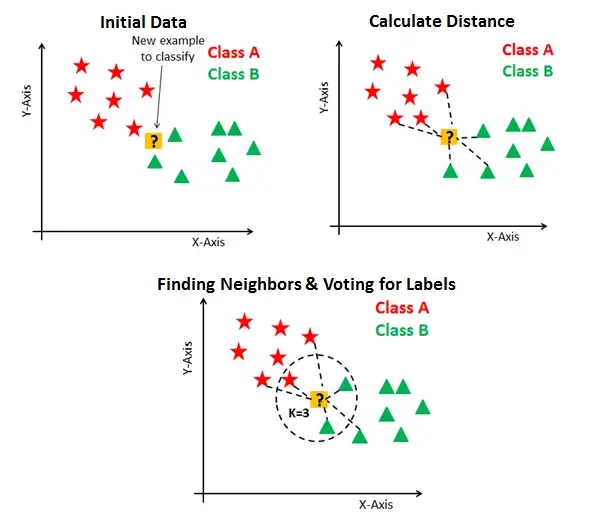

#Market Positioning of Mobile

##Dataset Information:
##Features Description
battery_power Total energy a battery can store in one time measured 
in mAh.

clock_speed The speed at which microprocessor executes 
instructions.

fc Front Camera megapixels.

int_memory Internal Memory in Gigabytes.

m_dep Mobile Depth in cm.

mobile_wt Weight of the mobile phone.

n_cores Number of cores of a processor.

pc Primary Camera megapixels.

px_height Pixel Resolution Height.

px_width Pixel Resolution Width.

ram Random Access Memory in MegaBytes.

sc_h Screen Height of mobile in cm.

sc_w Screen Width of mobile in cm.

talk_time The longest time that a single battery charge will last 
when you are.

price_range This is the target variable with the value of 0(low 
cost), 1(medium cost), 2(high cost) and 3(very high 
cost).

1.Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

2.Loading and Reading the Dataset

In [2]:
df= pd.read_csv("/content/mobile_data.csv")

3.EDA

In [3]:
df.head(10)

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   
5           1859          0.5   3          22    0.7        164        1   7   
6           1821          1.7   4          10    0.8        139        8  10   
7           1954          0.5   0          24    0.8        187        4   0   
8           1445          0.5   0          53    0.7        174        7  14   
9            509          0.6   2           9    0.1         93        5  15   

   px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0         20       756  2549     9     7         19            1  
1        905      1988  2631    17     3          7            2  
2       1263      1716  2603    11     2          9            2  
3       1216      1786  2769    16     8         11            2  
4       1208      1212  1411     8     2         15            1  
5       1004      1654  1067    17     1         10            1  
6        381      1018  3220    13     8         18            3  
7        512      1149   700    16     3          5            0  
8        386       836  1099    17     1         20            0  
9       1137      1224   513    19    10         12            0

In [4]:
df.shape

(2000, 15)

Insights:

Dataset has 15 features and 2000 atttributes.

Out of which 1 feature is dependant and other independant.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [7]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

insights:

Dataset has no missing data.

4. Data Visualiazation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70920ff340>,
      dtype=object)

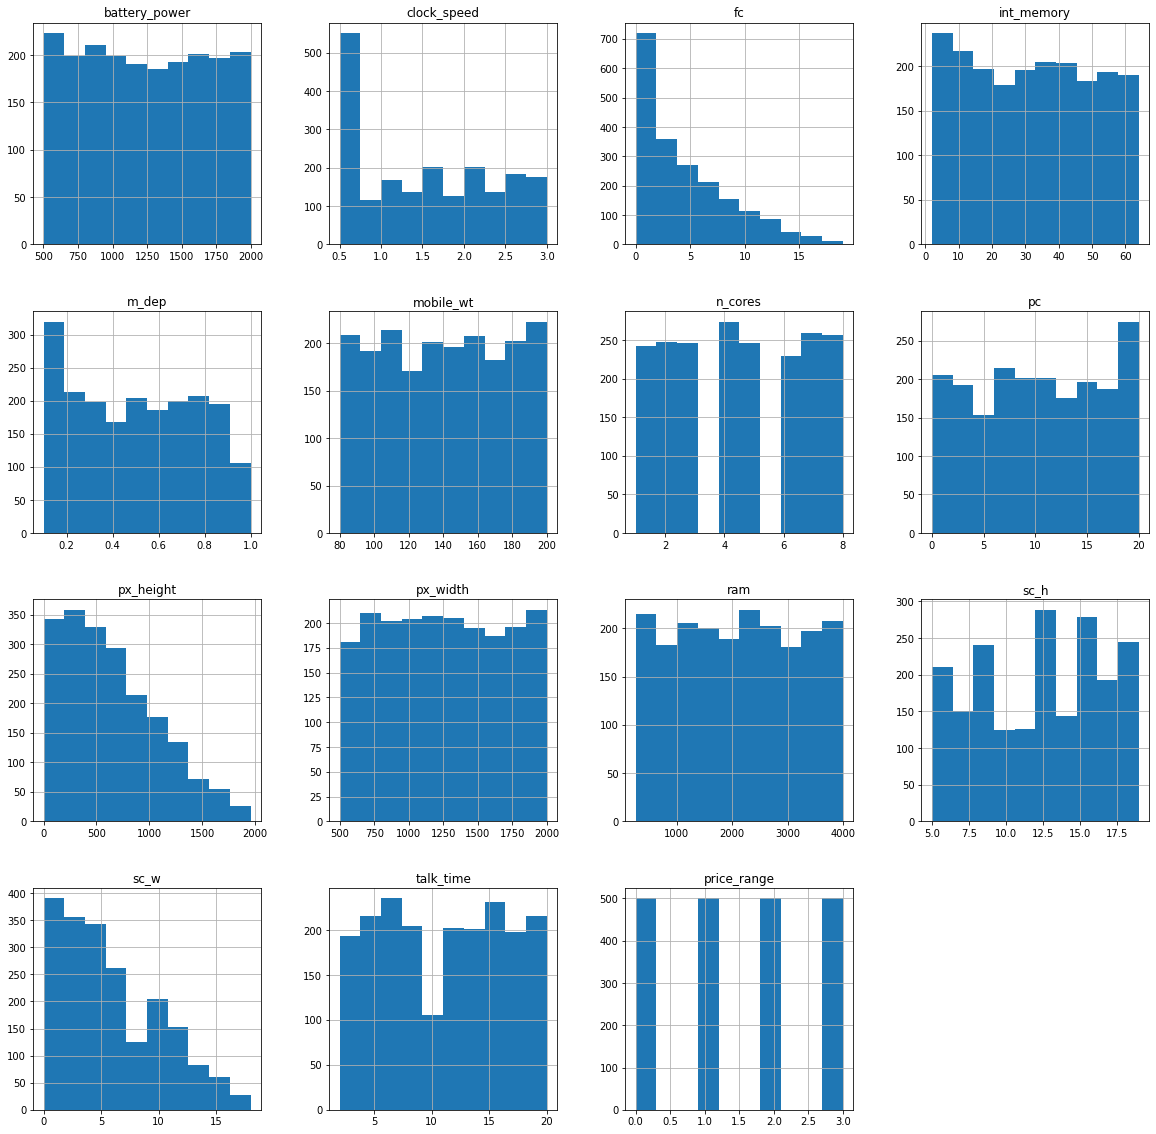

In [ ]:
df.hist(figsize=(20,20))

Insights:

Price_range has 4 categories from 0 to 3.

dataset is right skewed.

talk_time is bimodal distributed.

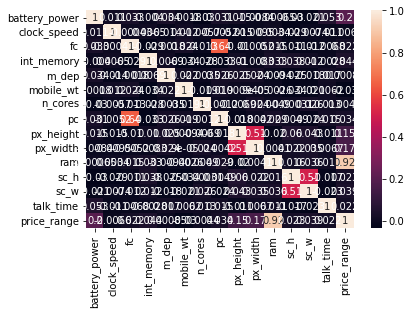

In [33]:
sn.heatmap(df.corr(),annot=True) 

Insights:

From above illustration we can see that in dataset features has no correlation.

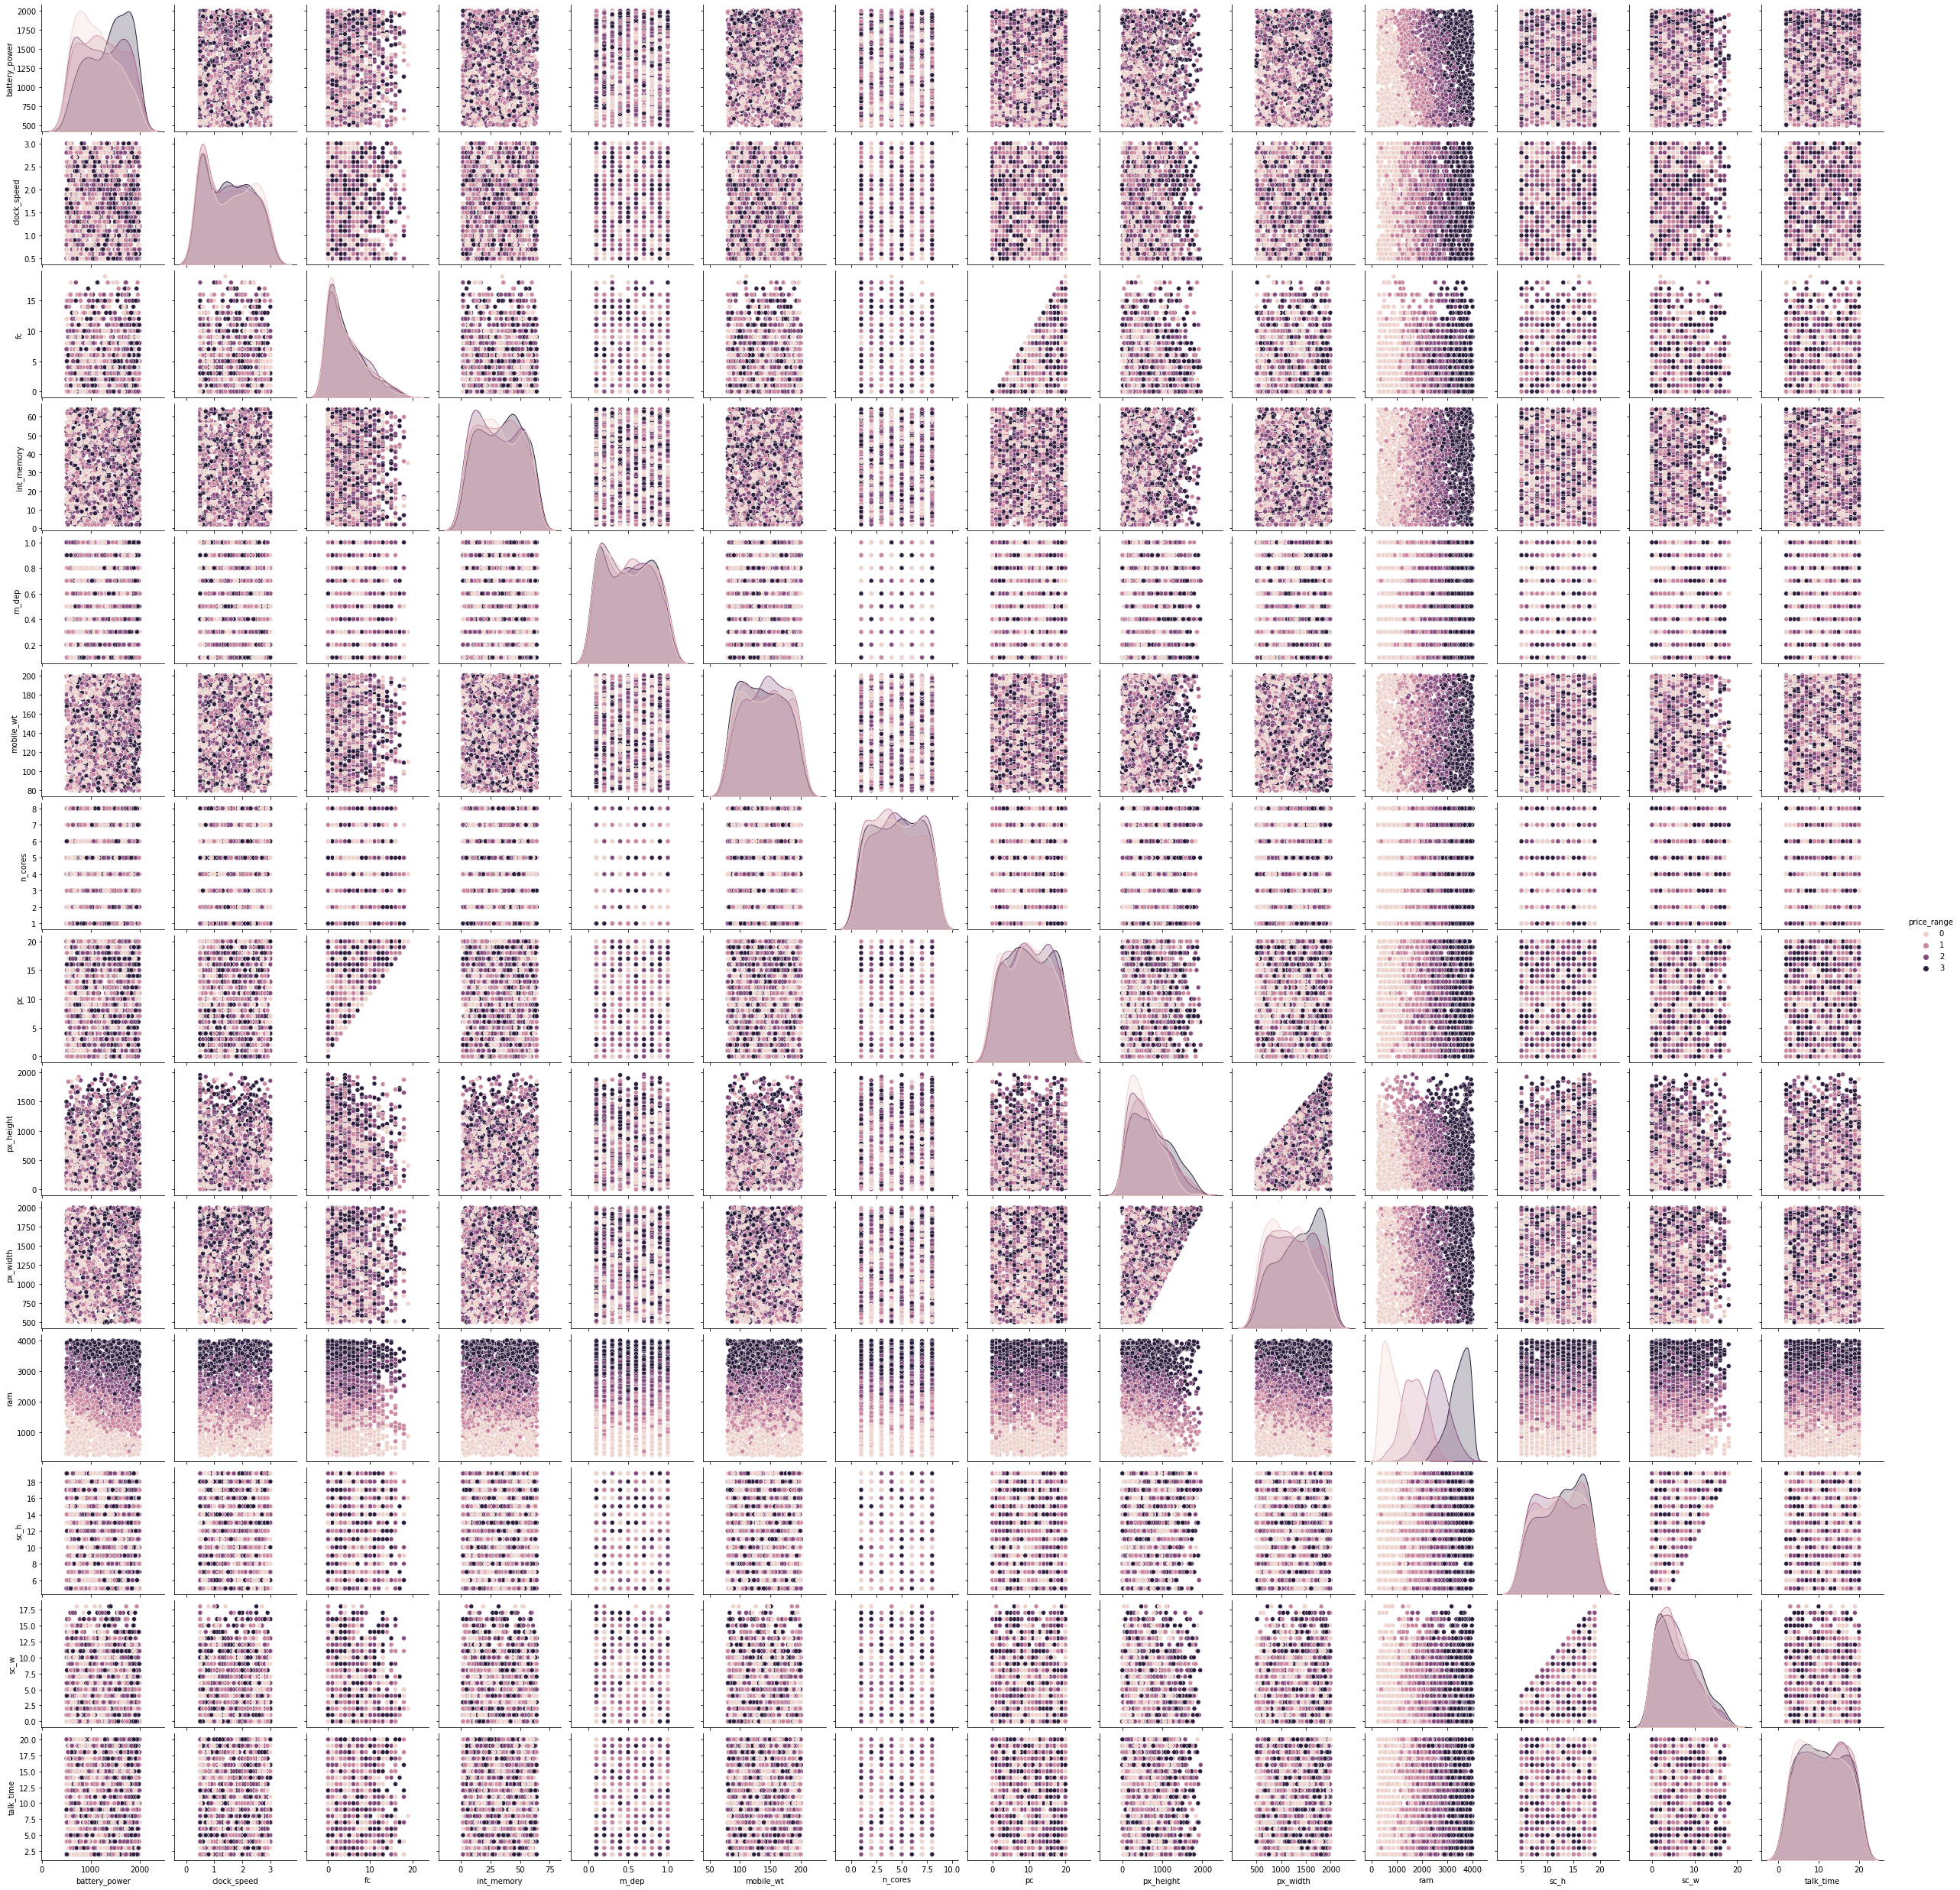

In [ ]:
figsize=(20,20)
sn.pairplot(df, hue="price_range")

insights:

No Features are correlated with each others.

From the above illsutration we can make out that dataset has outlier.

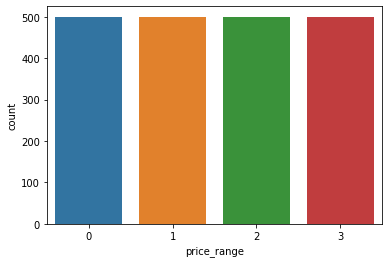

In [ ]:
sn.countplot(x="price_range",data=df)

insights:

price_range has equal no's of counts

5.Data Cleaning

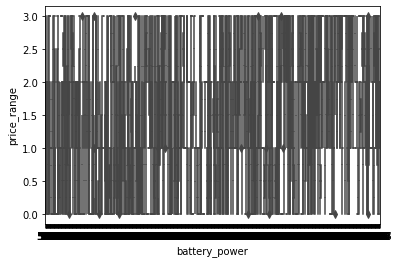

In [ ]:
sn.boxplot(x="battery_power", y="price_range", data=df)
plt.show()

Standardization action to ensure that data are scaled uniformly

In [8]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [10]:
scaler.fit(df.drop("price_range",axis=1))

StandardScaler()

In [13]:
df_feat=pd.DataFrame(Scaled_Features,columns=df.columns[:-1])
df_feat.head()

battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0      -0.902597     0.830779 -0.762495   -1.380644  0.340740   1.349249   
1      -0.495139    -1.253064 -0.992890    1.155024  0.687548  -0.120059   
2      -1.537686    -1.253064 -0.532099    0.493546  1.381165   0.134244   
3      -1.419319     1.198517 -0.992890   -1.215274  1.034357  -0.261339   
4       1.325906    -0.395011  2.002254    0.658915  0.340740   0.021220   

    n_cores        pc  px_height  px_width       ram      sc_h      sc_w  \
0 -1.101971 -1.305750  -1.408949 -1.146784  0.391703 -0.784983  0.283103   
1 -0.664768 -0.645989   0.585778  1.704465  0.467317  1.114266 -0.635317   
2  0.209639 -0.645989   1.392684  1.074968  0.441498 -0.310171 -0.864922   
3  0.646842 -0.151168   1.286750  1.236971  0.594569  0.876859  0.512708   
4 -1.101971  0.673534   1.268718 -0.091452 -0.657666 -1.022389 -0.864922   

   talk_time  
0   1.462493  
1  -0.734267  
2  -0.368140  
3  -0.002014  
4   0.730240

In [14]:
Scaled_Features= scaler.transform(df.drop("price_range",axis=1))
Scaled_Features

array([[-0.90259726,  0.83077942, -0.76249466, ..., -0.78498329,
         0.2831028 ,  1.46249332],
       [-0.49513857, -1.2530642 , -0.99289039, ...,  1.11426556,
        -0.63531667, -0.73426721],
       [-1.5376865 , -1.2530642 , -0.53209893, ..., -0.31017108,
        -0.86492153, -0.36814045],
       ...,
       [ 1.53077336, -0.76274805, -0.76249466, ..., -0.78498329,
        -1.0945264 , -1.10039396],
       [ 0.62252745, -0.76274805, -0.07130748, ...,  1.35167167,
         0.9719174 ,  1.46249332],
       [-1.65833069,  0.58562134,  0.15908825, ...,  1.58907778,
        -0.4057118 , -1.6495841 ]])

6.Deciding x and y

In [15]:
x=df.drop("price_range",axis=1)

In [16]:
y=df["price_range"]

Training & Testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_train[:5]

In [ ]:
y_test=[1 if value>0.8 else 0 for value in y_test]
y_test[:5]

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn= KNeighborsClassifier(n_neighbors=2)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
prediction=knn.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       163
           1       0.99      0.97      0.98       437

    accuracy                           0.97       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.97      0.97      0.97       600



In [30]:
print(confusion_matrix(y_test,prediction))

[[158   5]
 [ 13 424]]


Minimum error:- 0.01 at K = 12


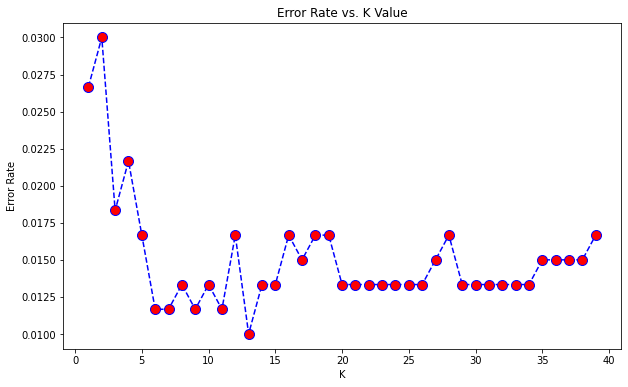

In [31]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the plot, you can see that the smallest error we got is 0.01 at K=12.

 Further on, we visualize the plot between accuracy and K value.

Maximum accuracy:- 0.99 at K = 12


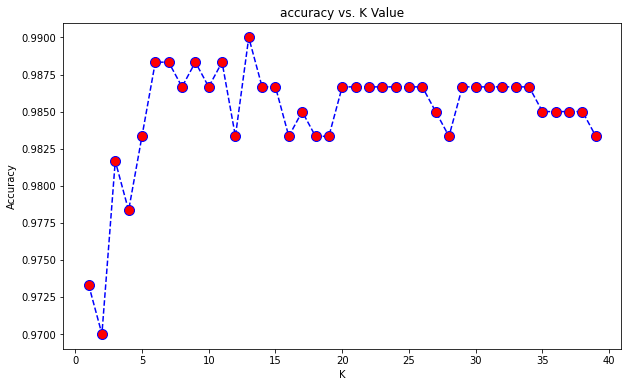

In [32]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

 We got the accuracy of 0.99 at K=12. 
 
 As we already derived the error plot and got the minimum error at k=12, so we will get better efficiency at that K value.